In [1]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import io

In [16]:
dogdata_w_mat = io.loadmat(os.path.join(r'C:\Users\mark.rainey\Downloads\data science\DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join(r'C:\Users\mark.rainey\Downloads\data science\DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

# Data Preparation
x = np.concatenate((dog_wave[:, :40],cat_wave[:, :40]),axis=1).T
x2 = np.concatenate((dog_wave[:, 40:80],cat_wave[:, 40:80]),axis=1).T

labels = np.vstack([np.hstack([np.ones(40), np.zeros(40)]),
                    np.hstack([np.zeros(40), np.ones(40)])]).T


# Neural Network Creation
model = Sequential([
    Dense(32, activation='relu', input_shape=(x.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd',  # trainscg in MATLAB is similar to SGD in TensorFlow
            loss='BinaryCrossentropy',
            metrics=['accuracy'])

# Training
model.fit(x, labels, epochs=100)

# Evaluation
y = model.predict(x)
y2 = model.predict(x2)
performance = model.evaluate(x, labels)
performance2 = model.evaluate(x2, labels)

# Convert outputs to classes
classes2 = np.argmax(y, axis=1)
classes3 = np.argmax(y2, axis=1)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.8104 - accuracy: 0.4250
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5875
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6875
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.7625
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4918 - accuracy: 0.8625
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.8875
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.9125
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.9125
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.9750
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.9625
Epoch 11/100
3/3 [===========

In [21]:
from matplotlib import image
file_path=r'C:\Users\mark.rainey\datascience\datascience\tdog.png'
lfile_path=r'C:\Users\mark.rainey\datascience\datascience\tdog.png'

img_data = image.imread(file_path)
img_data = np.mean(img_data,axis=2)
img_data = img_data.flatten()

limg_data = image.imread(lfile_path)
limg_data = np.mean(limg_data,axis=2)
limg_data = limg_data.flatten()

img_data_batch = np.vstack([img_data, limg_data])
tdog_predicted = model.predict(img_data_batch)
classes_tdog = np.argmax(tdog_predicted, axis=1)

1/1 [==============================] - 0s 94ms/step


In [22]:
file_path=r'C:\Users\mark.rainey\datascience\datascience\tcat.png'
dfile_path=r'C:\Users\mark.rainey\datascience\datascience\tcat.png'

img_data = image.imread(file_path)
img_data = np.mean(img_data,axis=2)
img_data = img_data.flatten()

dimg_data = image.imread(dfile_path)
dimg_data = np.mean(dimg_data,axis=2)
dimg_data = dimg_data.flatten()

img_data_batch = np.vstack([img_data, dimg_data])
tcat_predicted = model.predict(img_data_batch)
classes_tcat = np.argmax(tcat_predicted, axis=1)

1/1 [==============================] - 0s 35ms/step


In [17]:
from tensorflow.keras.models import load_model
model = load_model('catdog')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                32800     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 35,042
Trainable params: 35,042
Non-trainable params: 0
_________________________________________________________________


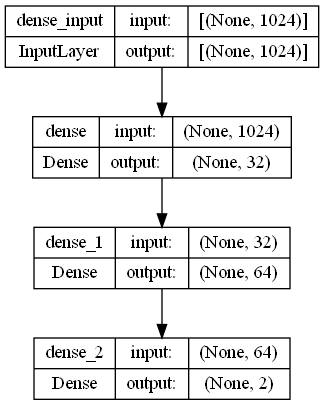

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [8]:
model.save('catdog')

INFO:tensorflow:Assets written to: catdog\assets
